# **Imagenette**

In [ ]:
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
import torch
import random
import numpy as np
from matplotlib import pyplot as plt
import torch.nn.functional as F

## **Imagenette**
- 13394 RGB images
- 10 classi

In [ ]:
import torchvision

In [ ]:
_ = torchvision.datasets.Imagenette(
    root='./data',
    split="train",
    # download=True,
)

LABELS_MAP = {
    "n01440764": "fish",
    "n02102040": "dog",
    "n02979186": "speaker",
    "n03000684": "electric saw",
    "n03028079": "church",
    "n03394916": "trumpet",
    "n03417042": "truck",
    "n03425413": "gas pump",
    "n03445777": "golf ball",
    "n03888257": "parachute"
}

label2target = {
    label: idx for idx, label in enumerate(LABELS_MAP.keys())
}

In [ ]:
print(list(LABELS_MAP.keys()))

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


In [ ]:
label2target

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

### **Custom ImageFolder Dataset**
È una classe che gestisce il dataset (che spesso dovrai implementare per il tuo task). È composto da:

- metodo __init__: di solito contiene delle strutture dati per i path alle immagini e i relativi target + transform

- metodo __getitem__: dato un indice, ritorna l'elemento del dataset con l'eventuale transform (immagine, target, file_path, etc)

- metodo __len__: indica quanti elementi ci sono nel dataset



In [ ]:
from torch.utils.data import Dataset
import os
from PIL import Image

In [ ]:
class ImageFolderDataset(Dataset):

  def __init__(
      self,
      root_dir: str, # "./data/imagenette2"
      split: str = "train",
      labels_map: dict = LABELS_MAP,
      transform: callable = None
  ) -> None:

    self.split_dir = os.path.join(root_dir, split) # e.g. "./data/imagenette2/train"

    # mi serve perchè ad ogni label deve essere associato un numero
    # e.g. { "n01440764": 0, "n02102040": 1}
    label2target = {
        label: idx for idx, label in enumerate(labels_map.keys())
    }

    self.images = []
    self.targets = []
    self.labels = []
    for class_id in os.listdir(self.split_dir):
      class_dir_path = os.path.join(self.split_dir, class_id)
      images = os.listdir(class_dir_path)
      self.images += [
          os.path.join(class_dir_path, image) for image in images
      ]
      self.targets += [label2target[class_id]]*len(images)

      self.labels += [labels_map[class_id]]*len(images)

    self.transform = transform


  def __getitem__(self, index):

    image_path = self.images[index]
    image_target = self.targets[index]
    image_label = self.labels[index]

    image = Image.open(image_path).convert('RGB')
    if self.transform:
      image = self.transform(image)

    return image, image_target, image_path, image_label

  def __len__(self):
    return len(self.images)


In [ ]:
import torchvision.transforms as T

In [ ]:
train_dataset = ImageFolderDataset(
    root_dir="./data/imagenette2",
    split="train",
    transform=T.Compose([
        T.ToTensor()
    ])
)

In [ ]:
image, target, path, label = train_dataset[0]

> Label fish
> Path: ./data/imagenette2/train/n01440764/n01440764_8414.JPEG


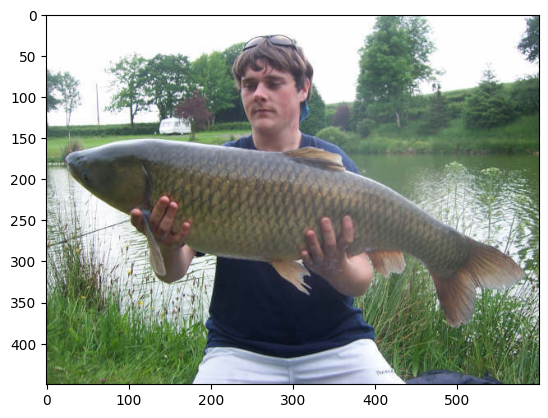

In [ ]:
import matplotlib.pyplot as plt

print(f"> Label {label}")
print(f"> Path: {path}")
original_image = Image.open(path)
plt.imshow(original_image)

> Label fish
> Path: ./data/imagenette2/train/n01440764/n01440764_8414.JPEG


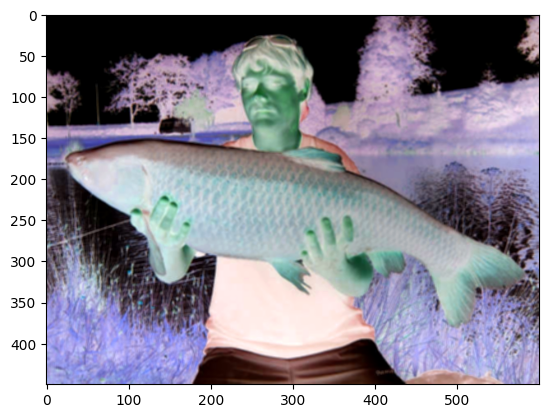

In [ ]:
import numpy as np
print(f"> Label {label}")
print(f"> Path: {path}")
np_image = image.numpy()
np_image = np.transpose(np_image, (1, 2, 0))
plt.imshow(np_image)

## **Image Classification Data Augmentation**

* [torchvision documentation](https://pytorch.org/vision/stable/transforms.html)

In [ ]:
train_transform = T.Compose([
    T.Resize((224, 224)), # image size di VGG
    T.RandomApply([
      T.GaussianBlur(3, (0.5, 5)),
      T.ColorJitter(0.5, 0.1, 0.5, 0.1),
    ], p=.5),
    T.RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    # T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = T.Compose([
    T.Resize((224, 224)), # image size di VGG
    T.ToTensor(),
    # T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
batch_size = 64


In [ ]:
train_dataset = ImageFolderDataset(
    root_dir="./data/imagenette2",
    split="train",
    transform=train_transform
)

val_dataset = ImageFolderDataset(
    root_dir="./data/imagenette2",
    split="val",
    transform=val_transform
)


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [ ]:
idx = random.randint(0, len(train_dataset))
image, target, path, label = train_dataset[idx]

**** ORIGINAL IMAGE ******
> Label speaker
> Path: ./data/imagenette2/train/n02979186/n02979186_24754.JPEG


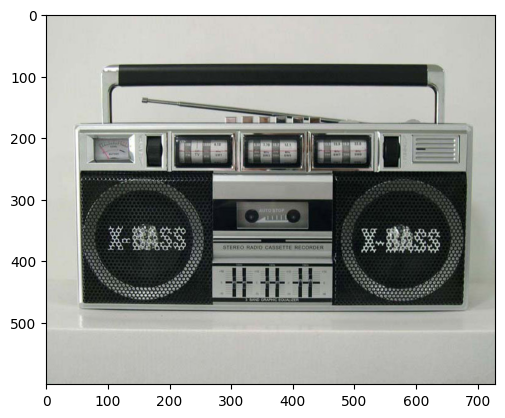

In [ ]:
print(f"**** ORIGINAL IMAGE ******")
print(f"> Label {label}")
print(f"> Path: {path}")
original_image = Image.open(path)
plt.imshow(original_image)

**** AUGMENTED IMAGE ******
> Label speaker
> Path: ./data/imagenette2/train/n02979186/n02979186_24754.JPEG


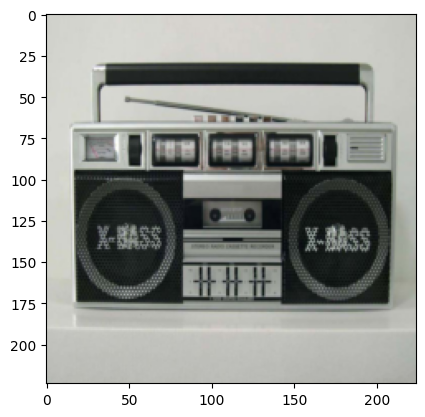

In [ ]:
print(f"**** AUGMENTED IMAGE ******")
print(f"> Label {label}")
print(f"> Path: {path}")
np_image = image.numpy()
np_image = np.transpose(np_image, (1, 2, 0))
plt.imshow(np_image)